# <a href="https://mipt-stats.gitlab.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 5. Анализ вакансий.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds22_bot`. Для начала работы с ботом каждый раз отправляйте `/start`.  **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb` и полученные данные (подробности далее). 
* Если вы выполняете <b><a href="#Сложная-часть" style="text-decoration: none;"><font color="orange">сложную часть</font></a></b>, то кроме `ipynb` прислать нужно также ноутбук, сконвертированный **в формате `html`**, который можно получить как `File -> Download as -> HTML`. **Внимательно проверьте, что plotly-графики в ней сохранились**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Будьте внимательны при работе со сбором данных. Ответственность за корректность ваших действий лежит на вас. Не нагружайте сервера, *делайте паузы между запросами*. Как следствие, начинайте выполнять задание заранее. **Если вас где-то забаннили и т.п., то это не является уважительной причиной продления дедлайна.**
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*


**Баллы за задание:**

<b><a href="#Легкая-часть" style="text-decoration: none;"><font color="blue">Легкая часть</font></a></b> (достаточно на "хор"):
* Задача 1 &mdash; 80 баллов

<b><a href="#Сложная-часть" style="text-decoration: none;"><font color="orange">Сложная часть</font></a></b> (необходимо на "отл"):
* Задача 2 &mdash; 60 баллов

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')
%matplotlib inline

import requests
from time import sleep
import json


Второй курс &mdash; самое время задуматься о будущей профессии и проанализировать существующие предложения. Дело тут даже не в том, чтобы найти интересную стажировку. В первую очередь сейчас стоит подумать о том, в какую сторону развиваться дальше. Например, если вы хотите работать в какой-либо конкретной профессии, то наверняка стоит развивать какие-то определенные навыки, и даже выбрать подходящую кафедру. Анализ существующих вакансий поможет определить, какие навыки вам нужны. 

В данном задании вам нужно проанализировать вакансии на сайте <a target="_blank" href="https://hh.ru/">hh.ru</a> с использованием <a target="_blank" href="https://dev.hh.ru/">официального API</a>.


 ---
### Справка по работе с API.   

<b><font color="red">Внимание!</font> При работе с API не забывайте делать паузы между запросами, чтобы не задудосить сервер HeadHunter. Если вас заблокируют, это не будет являться уважительной причиной переноса дедлайна.</b>

Мы будем работать только с вакансиями. Для этого не требуется регистрироваться и получать токен. Ниже приведен краткий пример работы с API. Подробное описание работы с вакансиями, включая параметры запросов и формат ответа можно почитать в <a target="_blank" href="https://github.com/hhru/api/blob/master/docs/vacancies.md#search">документации</a>.

Например, мы хотим найти вакансии по запросу `Data Scientist` в Москве. Тогда первую страницу поиска из 10 вакансий на страницу мы можем получить с запроса к API:

In [ ]:
URL = 'https://api.hh.ru/vacancies'

params = {
    'text': "Data Scientist",
    'area': 1,
    'page': 0,
    'per_page': 100
}

req = requests.get(URL, params)
data = json.loads(req.content.decode())

Если все прошло успешно, полученный словарь будет иметь следующие ключи

In [ ]:
data.keys()

dict_keys(['items', 'found', 'pages', 'per_page', 'page', 'clusters', 'arguments', 'alternate_url'])

In [ ]:
data.keys()

dict_keys(['items', 'found', 'pages', 'per_page', 'page', 'clusters', 'arguments', 'alternate_url'])

Можем посмотреть на краткое описание первой вакансии

In [ ]:
data['items'][0]

{'accept_temporary': False,
 'address': None,
 'alternate_url': 'https://hh.ru/vacancy/49423067',
 'apply_alternate_url': 'https://hh.ru/applicant/vacancy_response?vacancyId=49423067',
 'archived': False,
 'area': {'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'},
 'contacts': None,
 'created_at': '2022-03-17T12:37:57+0300',
 'department': None,
 'employer': {'alternate_url': 'https://hh.ru/employer/2324020',
  'id': '2324020',
  'logo_urls': {'240': 'https://hhcdn.ru/employer-logo/3414734.jpeg',
   '90': 'https://hhcdn.ru/employer-logo/3414733.jpeg',
   'original': 'https://hhcdn.ru/employer-logo-original/743443.jpg'},
  'name': 'Точка',
  'trusted': True,
  'url': 'https://api.hh.ru/employers/2324020',
  'vacancies_url': 'https://api.hh.ru/vacancies?employer_id=2324020'},
 'has_test': False,
 'id': '49423067',
 'insider_interview': None,
 'name': 'Data Scientist',
 'premium': False,
 'published_at': '2022-03-17T12:37:57+0300',
 'relations': [],
 'response_letter_requi

In [ ]:
data['items'][0]

{'accept_temporary': False,
 'address': None,
 'alternate_url': 'https://hh.ru/vacancy/49423067',
 'apply_alternate_url': 'https://hh.ru/applicant/vacancy_response?vacancyId=49423067',
 'archived': False,
 'area': {'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'},
 'contacts': None,
 'created_at': '2022-03-17T12:37:57+0300',
 'department': None,
 'employer': {'alternate_url': 'https://hh.ru/employer/2324020',
  'id': '2324020',
  'logo_urls': {'240': 'https://hhcdn.ru/employer-logo/3414734.jpeg',
   '90': 'https://hhcdn.ru/employer-logo/3414733.jpeg',
   'original': 'https://hhcdn.ru/employer-logo-original/743443.jpg'},
  'name': 'Точка',
  'trusted': True,
  'url': 'https://api.hh.ru/employers/2324020',
  'vacancies_url': 'https://api.hh.ru/vacancies?employer_id=2324020'},
 'has_test': False,
 'id': '49423067',
 'insider_interview': None,
 'name': 'Data Scientist',
 'premium': False,
 'published_at': '2022-03-17T12:37:57+0300',
 'relations': [],
 'response_letter_requi

Сколько всего найдено вакансий

In [ ]:
data['found']

369

In [ ]:
data['found']

279

Количество страниц в результатах поиска

In [ ]:
data['pages']

37

In [ ]:
data['pages']

3

Из результатов можем сделать удобную таблицу, причем в дальнейшем можно оставить только те колонки, которые необходимы для анализа.

In [ ]:
df = pd.json_normalize(data['items'])
df.head()

,id,premium,name,department,has_test,response_letter_required,salary,response_url,sort_point_distance,published_at,...,snippet.requirement,snippet.responsibility,schedule.id,schedule.name,salary.from,salary.to,salary.currency,salary.gross,address.metro,address
0,53211742,False,Junior Data scientist/ Младший риск-аналитик,None,False,True,NaN,None,None,2022-03-04T11:16:44+0300,...,"Умение работать в команде, открытость к новым ...",Несколько сайтов с посещаемостью около 1 млн. ...,fullDay,Полный день,NaN,NaN,NaN,NaN,NaN,NaN
1,53427577,True,Data Scientist / специалист по распознаванию и...,None,False,False,NaN,None,None,2022-03-05T17:29:20+0300,...,Есть опыт работы с методами машинного обучения...,Создание и развитие системы автоматического те...,fullDay,Полный день,100000.0,NaN,RUR,False,NaN,NaN
2,53409941,False,Data Scientist,None,False,False,NaN,None,None,2022-03-05T10:40:25+0300,...,"Глубокие знания математического анализа, линей...","Создание сложных торговых алгоритмов, статисти...",remote,Удаленная работа,4000.0,5000.0,EUR,False,NaN,NaN
3,52625579,False,Data scientist,None,False,False,NaN,None,None,2022-03-04T17:45:31+0300,...,Опыт реализации и применения моделей машинного...,Тебе предстоит вместе с нами с нуля построить ...,remote,Удаленная работа,150000.0,220000.0,RUR,False,NaN,NaN
4,53092406,False,Data scientist,None,False,False,NaN,None,None,2022-03-03T17:01:36+0300,...,Опыт работы на позиции <highlighttext>data</hi...,Работа в команде по созданию модуля <highlight...,fullDay,Полный день,300000.0,NaN,RUR,False,NaN,NaN


In [ ]:
df = pd.json_normalize(data['items'])
df.head()

,id,premium,name,department,has_test,response_letter_required,address,response_url,sort_point_distance,published_at,...,address.metro.station_name,address.metro.line_name,address.metro.station_id,address.metro.line_id,address.metro.lat,address.metro.lng,address.metro_stations,address.id,address.metro,employer.logo_urls
0,49423067,False,Data Scientist,NaN,False,False,NaN,None,None,2022-03-17T12:37:57+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,53929493,True,Data Scientist (CV+NLP),NaN,False,False,NaN,None,None,2022-03-16T12:35:21+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,53947371,True,Data Scientist (Корпоративный бизнес),NaN,False,False,NaN,None,None,2022-03-16T17:25:13+0300,...,Кутузовская,Филевская,4.73,4,55.740544,37.534100,"[{'station_name': 'Кутузовская', 'line_name': ...",731097,NaN,NaN
3,53211742,False,Junior Data scientist/ Младший риск-аналитик,NaN,False,True,NaN,None,None,2022-03-16T11:16:44+0300,...,Динамо,Замоскворецкая,2.34,2,55.789704,37.558212,"[{'station_name': 'Динамо', 'line_name': 'Замо...",1551673,NaN,NaN
4,53809111,False,Data scientist / Product analyst,NaN,False,False,NaN,None,None,2022-03-17T11:45:23+0300,...,Бауманская,Арбатско-Покровская,3.17,3,55.772405,37.679040,"[{'station_name': 'Бауманская', 'line_name': '...",743543,NaN,NaN


Для получения полного описания вакансии потребуется задать отдельный запрос, используя ее `id`.

In [ ]:
vacancy = df['id'].iloc[0]
vacancy_url = f'https://api.hh.ru/vacancies/{vacancy}'

req = requests.get(vacancy_url)
vacancy_info = json.loads(req.content.decode())

In [ ]:
vacancy_info

{'accept_handicapped': False,
 'accept_incomplete_resumes': False,
 'accept_kids': False,
 'accept_temporary': False,
 'address': None,
 'allow_messages': True,
 'alternate_url': 'https://hh.ru/vacancy/49423067',
 'apply_alternate_url': 'https://hh.ru/applicant/vacancy_response?vacancyId=49423067',
 'archived': False,
 'area': {'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'},
 'billing_type': {'id': 'standard_plus', 'name': 'Стандарт плюс'},
 'branded_description': '\n<style>\n.tmpl_hh_wrapper p,\n.tmpl_hh_wrapper a,\n.tmpl_hh_wrapper img,\n.tmpl_hh_wrapper ol,\n.tmpl_hh_wrapper ul,\n.tmpl_hh_wrapper li {\n    margin: 0;\n    padding: 0;\n    border: 0;\n    font-size: 100%;\n    font: inherit;\n    vertical-align: baseline;\n}\n\n.hht-vacancydescription {\n    padding: 0px;\n}\n\n.tmpl_hh_wrapper .l-cell,\n.tmpl_hh_wrapper .l-paddings {\n    padding: 0px !important;\n}\n\n.tmpl_hh_wrapper .b-vacancy-desc-wrapper {\n    margin-top: 0px !important;    \n}\n\n.tmpl_hh_wr

In [ ]:
vacancy_info

{'accept_handicapped': False,
 'accept_incomplete_resumes': False,
 'accept_kids': False,
 'accept_temporary': False,
 'address': None,
 'allow_messages': True,
 'alternate_url': 'https://hh.ru/vacancy/49423067',
 'apply_alternate_url': 'https://hh.ru/applicant/vacancy_response?vacancyId=49423067',
 'archived': False,
 'area': {'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'},
 'billing_type': {'id': 'standard_plus', 'name': 'Стандарт плюс'},
 'branded_description': '\n<style>\n.tmpl_hh_wrapper p,\n.tmpl_hh_wrapper a,\n.tmpl_hh_wrapper img,\n.tmpl_hh_wrapper ol,\n.tmpl_hh_wrapper ul,\n.tmpl_hh_wrapper li {\n    margin: 0;\n    padding: 0;\n    border: 0;\n    font-size: 100%;\n    font: inherit;\n    vertical-align: baseline;\n}\n\n.hht-vacancydescription {\n    padding: 0px;\n}\n\n.tmpl_hh_wrapper .l-cell,\n.tmpl_hh_wrapper .l-paddings {\n    padding: 0px !important;\n}\n\n.tmpl_hh_wrapper .b-vacancy-desc-wrapper {\n    margin-top: 0px !important;    \n}\n\n.tmpl_hh_wr

### <font color="blue"><i>Легкая часть</i></font>

 ---
### Задача 1.   

Исследуем профессию Data Scientist. Найдите как можно больше вакансий по этой профессии в Москве. Учтите, что имеет смысл искать также по другим ключевым словам, например `аналитик данных`.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')
%matplotlib inline

import requests
from time import sleep
import json

In [ ]:
import pandas as pd

URL = 'https://api.hh.ru/vacancies'

key_words = ["Data Scientist", "аналитик данных", "data analyst", "риск-аналитик", 
             "risk analyst"]

big_df = pd.DataFrame()

#Будем подгружать вакансии и тут же заносить их в DataFrame.
#Также будем печатать слово, соответствующее итерации, и количество вакансий, 
#загруженных на этой итерации.
for key_word in key_words:
  sleep(0.5)
  current_req = requests.get(URL, {'text': key_word, 'area': 1, 'page' : 0, 'per_page' : 100})
  sleep(0.5)
  current_data = json.loads(current_req.content.decode())
  current_pages = current_data['pages']
  for i in range(current_pages):
      print(key_word)
      sleep(0.5)
      current_req = requests.get(URL, {'text': key_word, 'area': 1, 'page' : i, 'per_page' : 100})
      sleep(0.5)
      current_data = json.loads(current_req.content.decode())
      print(len(current_data['items']))
      current_df = pd.json_normalize(current_data['items'])
      big_df = big_df.append(current_df)


Data Scientist
100
Data Scientist
100
Data Scientist
79
аналитик данных
100
аналитик данных
100
аналитик данных
100
аналитик данных
100
аналитик данных
100
аналитик данных
100
аналитик данных
100
аналитик данных
100
аналитик данных
100
аналитик данных
100
аналитик данных
100
аналитик данных
100
аналитик данных
100
аналитик данных
100
аналитик данных
100
аналитик данных
100
аналитик данных
100
аналитик данных
100
аналитик данных
100
аналитик данных
100
data analyst
100
data analyst
100
data analyst
100
data analyst
100
data analyst
100
data analyst
100
data analyst
100
data analyst
100
data analyst
100
data analyst
100
data analyst
100
data analyst
100
data analyst
100
data analyst
100
data analyst
100
data analyst
5
риск-аналитик
100
риск-аналитик
89
risk analyst
70


*Посмотрим, что получилось, и подготовим данные к анализу.*

In [ ]:
big_df

,id,premium,name,department,has_test,response_letter_required,address,response_url,sort_point_distance,published_at,...,address.metro.station_id,address.metro.line_id,address.metro.lat,address.metro.lng,address.metro_stations,address.id,address.metro,employer.logo_urls,insider_interview.id,insider_interview.url
0,49423067,False,Data Scientist,NaN,False,False,NaN,None,None,2022-03-17T12:37:57+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,53929493,True,Data Scientist (CV+NLP),NaN,False,False,NaN,None,None,2022-03-16T12:35:21+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,53211742,False,Junior Data scientist/ Младший риск-аналитик,NaN,False,True,NaN,None,None,2022-03-16T11:16:44+0300,...,2.34,2,55.789704,37.558212,"[{'station_name': 'Динамо', 'line_name': 'Замо...",1551673,NaN,NaN,NaN,NaN
3,53947371,True,Data Scientist (Корпоративный бизнес),NaN,False,False,NaN,None,None,2022-03-16T17:25:13+0300,...,4.73,4,55.740544,37.534100,"[{'station_name': 'Кутузовская', 'line_name': ...",731097,NaN,NaN,NaN,NaN
4,53809111,False,Data scientist / Product analyst,NaN,False,False,NaN,None,None,2022-03-17T11:45:23+0300,...,3.17,3,55.772405,37.679040,"[{'station_name': 'Бауманская', 'line_name': '...",743543,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,51784293,False,"Intern, Market Research",NaN,False,False,NaN,None,None,2022-02-21T10:48:38+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,52656722,False,Старший методолог в проект по EBITDA&risk,NaN,False,False,NaN,None,None,2022-02-18T10:11:42+0300,...,1.135,1,55.722388,37.562041,"[{'station_name': 'Спортивная', 'line_name': '...",5296114,NaN,NaN,NaN,NaN
67,52703465,False,"Frontend Developer in Kiel, Germany (Full relo...",NaN,False,False,NaN,None,None,2022-02-18T23:26:08+0300,...,NaN,NaN,NaN,NaN,[],7306163,NaN,NaN,NaN,NaN
68,51367552,False,Business Analyst (The Body Shop),NaN,False,False,NaN,None,None,2022-02-18T16:26:11+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
big_df = big_df.reset_index()
del big_df['index']

*Удалим вакансии-дубликаты.*

In [ ]:
big_df = big_df.loc[big_df.astype(str).drop_duplicates().index]
big_df = big_df.reset_index()
del big_df['index']

Загрузите подробное описание каждой вакансии и создайте удобную таблицу данных.

In [ ]:
#Создадим np.ndarray, содержащий все url-ссылки на интересующие нас вакансии
vacancies_urls = big_df['id']
vacancies_urls_template = np.array(['https://api.hh.ru/vacancies/'] * big_df.shape[0])
vacancies_urls = vacancies_urls_template + vacancies_urls

#Будем загружать подробные описания вакансий и сразу записывать их в DataFrame
#А также сразу печатать на каждой итерации её номер и url-ссылку на соответствующую вакансию.
vacancy_df = pd.DataFrame()

for i in range(big_df.shape[0]):
  sleep(0.5)
  current_vacancy_url = vacancies_urls[i]
  current_req = requests.get(current_vacancy_url)
  current_vacancy_info = json.loads(current_req.content.decode())
  current_vacancy_df = pd.json_normalize(current_vacancy_info)
  vacancy_df = vacancy_df.append(current_vacancy_df)
  sleep(0.5)
  print(i)
  print(current_vacancy_url)


Выходные данные были обрезаны до нескольких последних строк (5000).
1445
https://api.hh.ru/vacancies/46734257
1446
https://api.hh.ru/vacancies/53934960
1447
https://api.hh.ru/vacancies/53211078
1448
https://api.hh.ru/vacancies/53265444
1449
https://api.hh.ru/vacancies/46953085
1450
https://api.hh.ru/vacancies/53811922
1451
https://api.hh.ru/vacancies/51253594
1452
https://api.hh.ru/vacancies/51061421
1453
https://api.hh.ru/vacancies/53808967
1454
https://api.hh.ru/vacancies/53990365
1455
https://api.hh.ru/vacancies/54055626
1456
https://api.hh.ru/vacancies/52057059
1457
https://api.hh.ru/vacancies/50598354
1458
https://api.hh.ru/vacancies/48789479
1459
https://api.hh.ru/vacancies/53620250
1460
https://api.hh.ru/vacancies/50401314
1461
https://api.hh.ru/vacancies/51404059
1462
https://api.hh.ru/vacancies/53875163
1463
https://api.hh.ru/vacancies/39449962
1464
https://api.hh.ru/vacancies/52624045
1465
https://api.hh.ru/vacancies/52411974
1466
https://api.hh.ru/vacancies/52460989
1467
htt

*Посмотрим, что получилось, и подготовим данные для анализа.*

In [ ]:
vacancy_df

,id,premium,relations,name,insider_interview,response_letter_required,address,allow_messages,department,contacts,...,vacancy_constructor_template.top_picture.width,vacancy_constructor_template.top_picture.path,vacancy_constructor_template.top_picture.blurred_path,vacancy_constructor_template.bottom_picture,insider_interview.id,insider_interview.url,vacancy_constructor_template.bottom_picture.height,vacancy_constructor_template.bottom_picture.width,vacancy_constructor_template.bottom_picture.path,vacancy_constructor_template.bottom_picture.blurred_path
0,49423067,False,[],Data Scientist,None,False,None,True,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,53929493,True,[],Data Scientist (CV+NLP),None,False,None,False,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,53211742,False,[],Junior Data scientist/ Младший риск-аналитик,None,True,None,True,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,53947371,True,[],Data Scientist (Корпоративный бизнес),None,False,None,True,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,53809111,False,[],Data scientist / Product analyst,None,False,None,True,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,51784293,False,[],"Intern, Market Research",None,False,None,True,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,52656722,False,[],Старший методолог в проект по EBITDA&risk,None,False,None,True,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,52703465,False,[],"Frontend Developer in Kiel, Germany (Full relo...",None,False,None,True,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,51367552,False,[],Business Analyst (The Body Shop),None,False,None,True,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
vacancy_df = vacancy_df.reset_index()
del vacancy_df['index']

**Полученную таблицу необходимо сохранить в формате xlsx и отправить боту вместе с решением.**

In [ ]:
excel_file = vacancy_df.to_excel("vacancy.xlsx")

from google.colab import files

files.download('/content/vacancy.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Вопрос 1.** Сколько сейчас доступно вакансий по вашему запросу?

In [ ]:
print(vacancy_df.shape[0])

3945


**Вопрос 2.** Какие навыки чаще всего встречаются в вакансиях по данной специальности?

Для этого найдите соответствующее поле в данных, проанализируйте его и составьте список навыков и количество упоминаний каждого. Визуализируйте полученную информацию по топ-15 навыков.

*Какие колонки вообще есть?*

In [ ]:
vacancy_df.columns

Index(['id', 'premium', 'relations', 'name', 'insider_interview',
       'response_letter_required', 'address', 'allow_messages', 'department',
       'contacts', 'description', 'branded_description',
       'vacancy_constructor_template', 'key_skills', 'accept_handicapped',
       'accept_kids', 'archived', 'response_url', 'specializations',
       'professional_roles', 'code', 'hidden', 'quick_responses_allowed',
       'driver_license_types', 'accept_incomplete_resumes', 'published_at',
       'created_at', 'negotiations_url', 'suitable_resumes_url',
       'apply_alternate_url', 'has_test', 'test', 'alternate_url',
       'working_days', 'working_time_intervals', 'working_time_modes',
       'accept_temporary', 'billing_type.id', 'billing_type.name', 'area.id',
       'area.name', 'area.url', 'salary.from', 'salary.to', 'salary.currency',
       'salary.gross', 'type.id', 'type.name', 'site.id', 'site.name',
       'experience.id', 'experience.name', 'schedule.id', 'schedule.name',

*Подготовим данные для анализа.*

In [ ]:
#Удалим те строки, в которых в графе "key_skills" были пропуски
vacancy_df_without_nan_key_skills = vacancy_df.dropna(subset=['key_skills'], how='all')

*Посмотрим, какие навыки вообще встречаются в key_skills.*

In [ ]:
from functools import reduce

merge = lambda s: reduce(lambda d,el: d.extend(el) or d, s, [])
merged_key_skills = merge(vacancy_df_without_nan_key_skills['key_skills'])
merged_key_skills = pd.Series(np.array(merged_key_skills))
merged_key_skills = pd.DataFrame(merged_key_skills.apply(lambda x: x['name']), columns=['skill'])

In [ ]:
#Получим DataFrame навыков с количеством упоминания каждого
grouped_key_skills = pd.DataFrame(merged_key_skills.groupby(['skill']).size(), columns=[ 'count'])
grouped_key_skills = grouped_key_skills.sort_values(by=['count'], ascending=False)
grouped_key_skills = grouped_key_skills.reset_index()

*Визулизируем 15 наиболее часто упоминаемых (встречающихся в датасете) навыков, покажем количества упоминаний каждого из них.*

In [ ]:
#Проверим, что в 15-ой строке 'count' меньше, чем в 14-ой, т.е. что отсечка первых 15-ти навыков справедлива
grouped_key_skills[14: 16]

,skill,count
14,MS Excel,237
15,Работа с большим объемом информации,229


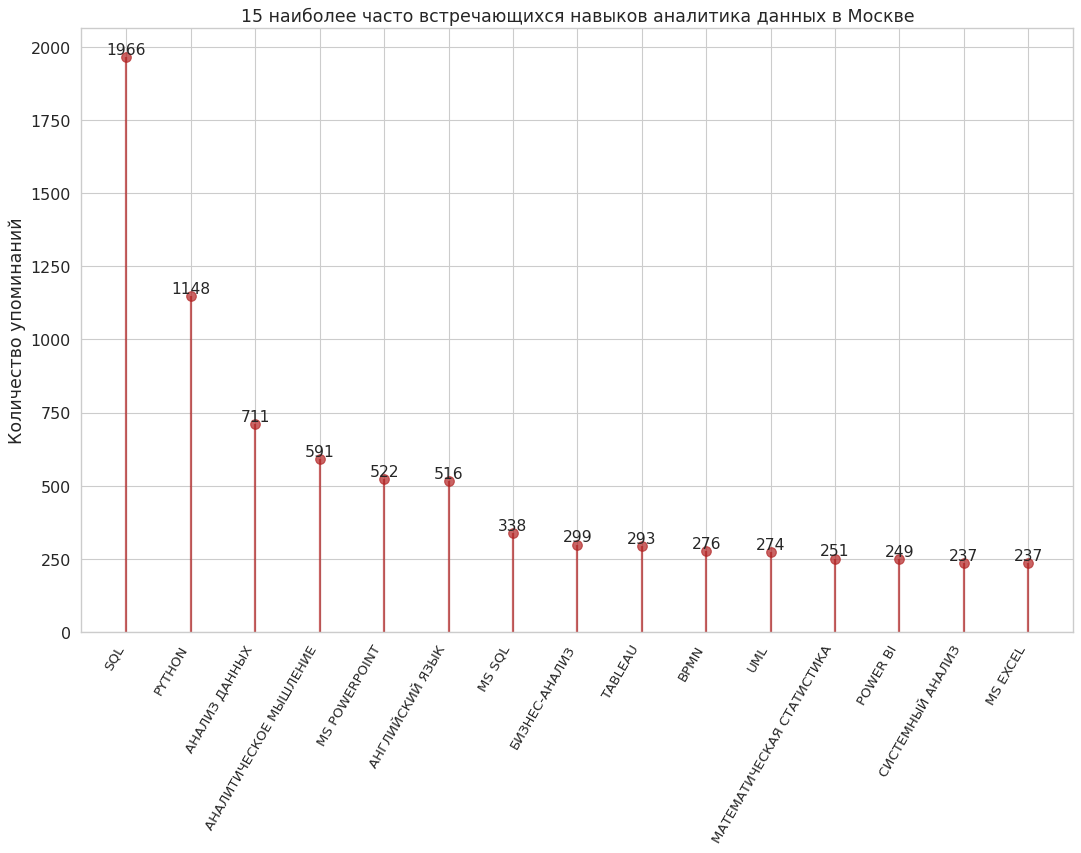

In [ ]:
grouped_key_skills_15 = grouped_key_skills.iloc[0:15]

fig, ax = plt.subplots(figsize=(16,10), dpi= 80)
ax.vlines(x=grouped_key_skills_15.index, ymin=0, ymax=grouped_key_skills_15['count'], color='firebrick', alpha=0.7, linewidth=2)
ax.scatter(x=grouped_key_skills_15.index, y=grouped_key_skills_15['count'], s=75, color='firebrick', alpha=0.7)

ax.set_title('15 наиболее часто встречающихся навыков аналитика данных в Москве')
ax.set_ylabel('Количество упоминаний')
ax.set_xticks(grouped_key_skills_15.index)
ax.set_xticklabels(grouped_key_skills_15['skill'].str.upper(), rotation=60, fontdict={'horizontalalignment': 'right', 'size':12})
ax.set_ylim(0,)

for row in grouped_key_skills_15.itertuples():
    ax.text(row.Index, row.count, s=round(row.count, 2), horizontalalignment= 'center', verticalalignment='bottom', fontsize=14)

plt.show()

*На графике видим список 15-ти наиболее востребованных навыков для аналитика данных, запрашиваемых в Москве. Как и ожидалось, SQL и Python - в топе.*

**Вопрос 3.** Какую зарплату готовы платить работодатели? Соберите некоторым образом статистику и постройте гистограмму.

При работе с данными о заработной плате обратите внимание на валюту и <a target="_blank" href="https://yandex.ru/search/?text=gross%2Fnet&clid=1955455&win=446&lr=213&noreask=1">gross/net</a>. 

*Посмотрим, зарплаты в каких валютах встречаются в датасете.*

In [ ]:
vacancy_df.groupby(['salary.currency']).size()

salary.currency
EUR     15
RUR    717
USD     27
dtype: int64

*В датасете встречаются рубли, доллары и евро. Учтём это при подготовке данных к анализу - будем все суммы переводить в рубли, используя актуальный курс.*

*Запросим у сайта ЦБ РФ курсы доллара и евро в текущий момент.*

In [ ]:
import requests

data = requests.get('https://www.cbr-xml-daily.ru/daily_json.js').json()
dollar_value = data['Valute']['USD']['Value']
euro_value = data['Valute']['EUR']['Value']


*Для каждой вакансии найдём нижнюю и верхнюю границу предлагаемой зарплаты в рублях после вычета налогов (т.е. net). Также найдём медианы и средние значения.*

In [ ]:
# Функция, возвращающая коэффициент, переводящий евро и доллары в рубли
def convert(currency):
  if currency == 'EUR':
    return euro_value 
  elif currency == 'USD':
    return dollar_value
  else:
    return 1

# Функция, возвращающая коэффициент, переводящий gross-зарплаты в соотв. net-зарплату, 
# т.е. для зарплат, указанных без учёта налогового вычета, функция возвращает коэффициент,
# при домножении на который получается сумма оплаты труда с учётом налогов (-13 %)
def tax(gross_param):
  if gross_param:
    return 0.87
  else:
    return 1

# Рассмотрим датасет, в котором нет строк, в которых не указаны никакие сведения о зарплате
vacancy_df_without_nan_salaries = vacancy_df.dropna(subset=['salary.from', 'salary.to', 'salary.currency', 'salary.gross'], how='all')
vacancy_df_without_nan_salaries = vacancy_df_without_nan_salaries.reset_index()
del vacancy_df_without_nan_salaries['index']

# Вычислим нижнюю границу зарплаты в рублях после вычета налогов, а также среднее и медиану
vacancy_df_without_nan_salaries['salary.from in rubles'] = vacancy_df_without_nan_salaries['salary.from'] * (vacancy_df_without_nan_salaries['salary.currency'].apply(convert)) * (vacancy_df_without_nan_salaries['salary.gross'].apply(tax))
vacancy_salary_from_median = vacancy_df_without_nan_salaries['salary.from in rubles'].median()
vacancy_salary_from_mean = vacancy_df_without_nan_salaries['salary.from in rubles'].mean()

# Вычислим верхнюю границу зарплаты в рублях после вычета налогов, а также среднее и медиану
vacancy_df_without_nan_salaries['salary.to in rubles'] = vacancy_df_without_nan_salaries['salary.to'] * (vacancy_df_without_nan_salaries['salary.currency'].apply(convert)) * (vacancy_df_without_nan_salaries['salary.gross'].apply(tax))
vacancy_salary_to_median = vacancy_df_without_nan_salaries['salary.to in rubles'].median()
vacancy_salary_to_mean = vacancy_df_without_nan_salaries['salary.to in rubles'].mean()


*Рассмотрим нижние границы зарплатных вилок.*

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


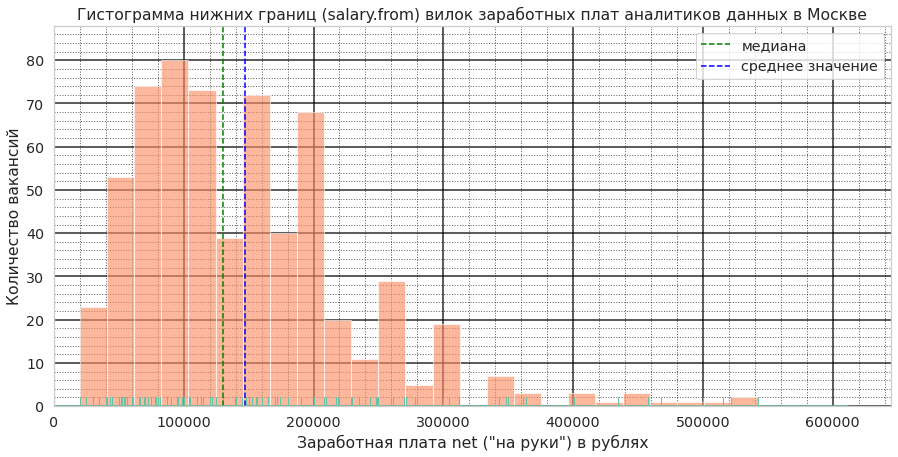

In [ ]:
plt.figure(figsize=(15, 7))
sns.distplot(vacancy_df_without_nan_salaries['salary.from in rubles'], bins=25, rug=True)
plt.hist(vacancy_df_without_nan_salaries['salary.from in rubles'], bins=25, alpha=0.63)
plt.xlabel('Заработная плата net ("на руки") в рублях')
plt.ylabel('Количество вакансий')
plt.title('Гистограмма нижних границ (salary.from) вилок заработных плат аналитиков данных в Москве')
plt.ylim(0,)
plt.xlim(0,)
plt.minorticks_on()
plt.grid(which='minor', color = 'k', linestyle = ':', alpha=0.63)
plt.grid(which='major', color = 'k', linewidth = 2, alpha=0.63)
plt.vlines(vacancy_salary_from_median, 0, 10000, color='green', linestyle='--', label='медиана')
plt.vlines(vacancy_salary_from_mean, 0, 10000, color='blue', linestyle='--', label='среднее значение')
plt.legend()
plt.show()

*Видим, что нижние границы зарплатных вилок аналитиков данных в Москве расположены, в основном, в диапазоне от 80 до 200 тысяч рублей.*

*Теперь рассмотрим верхние границы.*

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


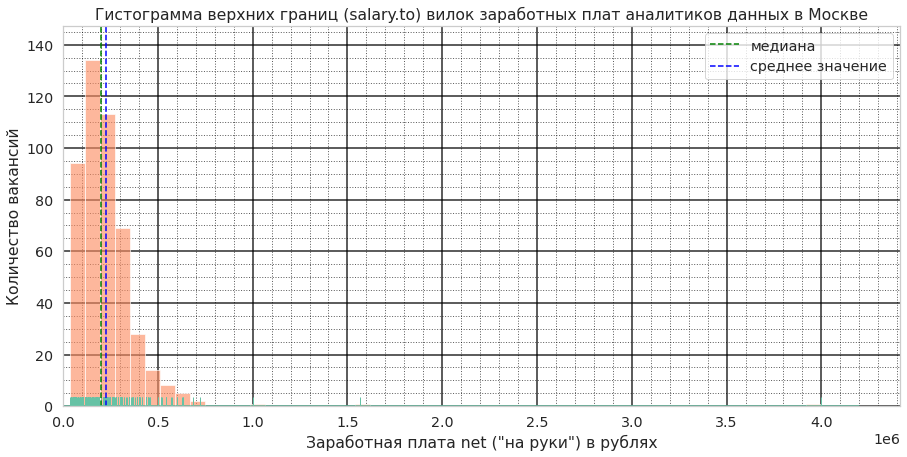

In [ ]:
plt.figure(figsize=(15, 7))
sns.distplot(vacancy_df_without_nan_salaries['salary.to in rubles'], bins=50, rug=True)
plt.hist(vacancy_df_without_nan_salaries['salary.to in rubles'], bins=50, alpha=0.63)
plt.xlabel('Заработная плата net ("на руки") в рублях')
plt.ylabel('Количество вакансий')
plt.title('Гистограмма верхних границ (salary.to) вилок заработных плат аналитиков данных в Москве')
plt.ylim(0,)
plt.xlim(0,)
plt.minorticks_on()
plt.grid(which='minor', color = 'k', linestyle = ':', alpha=0.63)
plt.grid(which='major', color = 'k', linewidth = 2, alpha=0.63)
plt.vlines(vacancy_salary_to_median, 0, 10000, color='green', linestyle='--', label='медиана')
plt.vlines(vacancy_salary_to_mean, 0, 10000, color='blue', linestyle='--', label='среднее значение')
plt.legend()
plt.show()

*Видим, что встречается небольшое количество крайне высоких верхних границ зарплатных вилок (по несколько миллионов рублей), в то время как большая часть верхних границ зарплатных вилок меньше миллиона рублей. Поэтому сузим рассматриваемый промежуток зарплат, чтобы посмотреть распределение верхних границ вилок  в том диапазоне, в котором они чаще всего встречаются.*

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


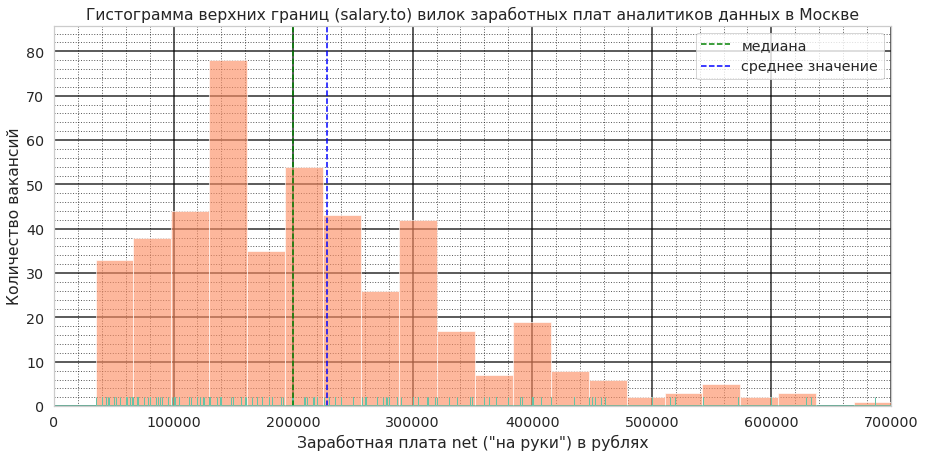

In [ ]:
plt.figure(figsize=(15, 7))
sns.distplot(vacancy_df_without_nan_salaries['salary.to in rubles'], bins=125, rug=True)
plt.hist(vacancy_df_without_nan_salaries['salary.to in rubles'], bins=125, alpha=0.63)
plt.xlabel('Заработная плата net ("на руки") в рублях')
plt.ylabel('Количество вакансий')
plt.title('Гистограмма верхних границ (salary.to) вилок заработных плат аналитиков данных в Москве')
plt.ylim(0,)
plt.xlim(0, 700000)
plt.minorticks_on()
plt.grid(which='minor', color = 'k', linestyle = ':', alpha=0.63)
plt.grid(which='major', color = 'k', linewidth = 2, alpha=0.63)
plt.vlines(vacancy_salary_to_median, 0, 10000, color='green', linestyle='--', label='медиана')
plt.vlines(vacancy_salary_to_mean, 0, 10000, color='blue', linestyle='--', label='среднее значение')
plt.legend()
plt.show()

*Видим, что верхние границы зарплатных вилок аналитиков данных в Москве расположены, в основном, в промежутку от 100 до 300 тысяч рублей.*

*Теперь рассмотрим визуализацию зарплатных вилок.*

In [ ]:
vacancy_df_without_nan_salaries_from_and_to = vacancy_df_without_nan_salaries.dropna(subset=['salary.from', 'salary.to'], how='any')
vacancy_df_without_nan_salaries_from_and_to = vacancy_df_without_nan_salaries_from_and_to.reset_index()
del vacancy_df_without_nan_salaries_from_and_to['index']

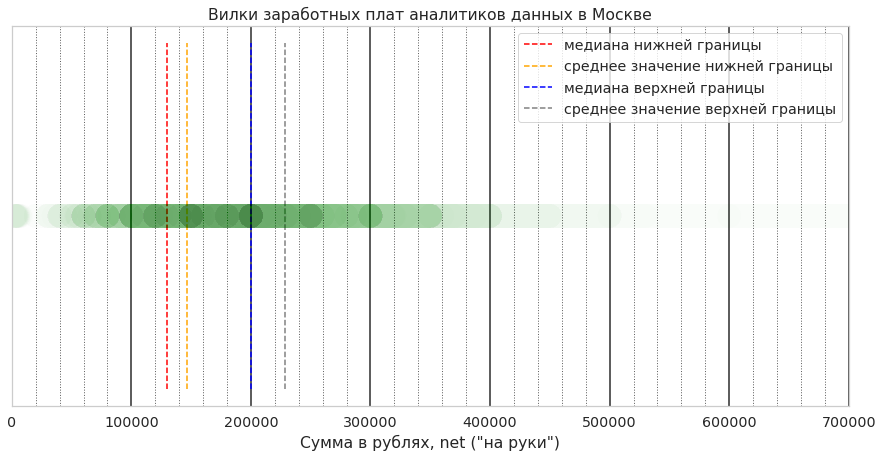

In [ ]:
plt.figure(figsize=(15, 7))

for i in range(vacancy_df_without_nan_salaries_from_and_to.shape[0]):
  current_from = vacancy_df_without_nan_salaries_from_and_to['salary.from'][i]
  current_to = vacancy_df_without_nan_salaries_from_and_to['salary.to'][i]
  x = np.arange(current_from, current_to)
  y = np.zeros(int(current_to) - int(current_from))
  plt.plot(x, y, color='green', alpha=0.008, linewidth = 24)
  #На примере прошлого графики видно, что полезно выставить ограничение сверху на ось OX
  plt.xlim(0, 700000)
  plt.yticks([])

plt.minorticks_on()
plt.grid(which='minor', color = 'k', linestyle = ':', alpha=0.63)
plt.grid(which='major', color = 'k', linewidth = 2, alpha=0.63)
plt.xlabel('Сумма в рублях, net ("на руки")')
plt.title('Вилки заработных плат аналитиков данных в Москве')
plt.vlines(vacancy_salary_from_median, -100000, 100000, color='red', linestyle='--', label='медиана нижней границы')
plt.vlines(vacancy_salary_from_mean, -100000, 100000, color='orange', linestyle='--', label='среднее значение нижней границы')
plt.vlines(vacancy_salary_to_median, -100000, 100000, color='blue', linestyle='--', label='медиана верхней границы')
plt.vlines(vacancy_salary_to_mean, -100000, 100000, color='grey', linestyle='--', label='среднее значение верхней границы')
plt.legend()
plt.show()

*Видим, что зарплатные вилки "гуще" всего покрывают промежуток от 80 до 300 тысяч рублей.*

Проведите аналогичный анализ для наиболее привлекательной для вас профессии в любом регионе. Если это Data Scientist, то для анализа выберите другую.

*Сохраним накопленные данные для дальнейшего анализа.*

In [ ]:
vacancy_df_of_analitics = vacancy_df.copy()
big_df_of_analitics = big_df.copy()

*Выполним аналогичный анализ для профессии "системный администратор".*

In [ ]:
URL = 'https://api.hh.ru/vacancies'

key_words = ["системный администратор", "сисадмин", "эникей", "системный архитектор-инженер", 
             "сетевой администратор"]

big_df = pd.DataFrame()

for key_word in key_words:
  print(key_word)
  sleep(0.5)
  current_req = requests.get(URL, {'text': key_word, 'area': 1, 'page' : 0, 'per_page' : 100})
  sleep(0.5)
  current_data = json.loads(current_req.content.decode())
  current_pages = current_data['pages']
  for i in range(current_pages):
      sleep(0.5)
      current_req = requests.get(URL, {'text': key_word, 'area': 1, 'page' : i, 'per_page' : 100})
      sleep(0.5)
      current_data = json.loads(current_req.content.decode())
      print(len(current_data['items']))
      current_df = pd.json_normalize(current_data['items'])
      big_df = big_df.append(current_df)

системный администратор
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
17
сисадмин
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
1
эникей
3
системный архитектор-инженер
62
сетевой администратор
100
100
38


*Посмотрим, что получилось и подготовим данные для анализа.*

In [ ]:
big_df

,id,premium,name,department,has_test,response_letter_required,response_url,sort_point_distance,published_at,created_at,...,address.metro.line_id,address.metro.lat,address.metro.lng,employer.logo_urls,address,department.id,department.name,salary,insider_interview.id,insider_interview.url
0,53942433,False,Помощник системного администратора,NaN,False,False,None,None,2022-03-16T15:54:51+0300,2022-03-16T15:54:51+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,53414940,False,Старший системный администратор,NaN,True,False,None,None,2022-03-18T11:35:33+0300,2022-03-18T11:35:33+0300,...,97,55.749100,37.539500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,54033144,False,Системный администратор,NaN,False,False,None,None,2022-03-18T10:37:22+0300,2022-03-18T10:37:22+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,53800102,False,Младший системный администратор,NaN,False,False,None,None,2022-03-17T09:49:59+0300,2022-03-17T09:49:59+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,54004312,False,Системный администратор,NaN,False,False,None,None,2022-03-17T17:34:57+0300,2022-03-17T17:34:57+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33,52588358,False,DevOps инженер (в команду Credit Cards),NaN,False,False,None,None,2022-02-17T09:37:35+0300,2022-02-17T09:37:35+0300,...,2,55.818923,37.497791,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34,52076765,False,Fixed Network Engineer (GPON),NaN,False,False,None,None,2022-02-21T19:15:16+0300,2022-02-21T19:15:16+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,51743767,False,Архитектор продуктов (Enterprise),NaN,False,False,None,None,2022-02-22T17:21:44+0300,2022-02-22T17:21:44+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,52623789,False,Network Administrator,NaN,False,False,None,None,2022-02-17T17:20:40+0300,2022-02-17T17:20:40+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
big_df = big_df.reset_index()
del big_df['index']

In [ ]:
# Удалим дубликаты
big_df = big_df.loc[big_df.astype(str).drop_duplicates().index]
big_df = big_df.reset_index()
del big_df['index']

*Скачаем подробные описания каждой из вакансий.*

In [ ]:
vacancies_urls = big_df['id']
vacancies_urls_template = np.array(['https://api.hh.ru/vacancies/'] * big_df.shape[0])
vacancies_urls = vacancies_urls_template + vacancies_urls
vacancies_urls

# Действуем также, как и раньше - скачиваем вакансии по одной и сразу добавляем в DataFrame
vacancy_df = pd.DataFrame()

for i in range(big_df.shape[0]):
  sleep(0.5)
  current_vacancy_url = vacancies_urls[i]
  current_req = requests.get(current_vacancy_url)
  current_vacancy_info = json.loads(current_req.content.decode())
  current_vacancy_df = pd.json_normalize(current_vacancy_info)
  vacancy_df = vacancy_df.append(current_vacancy_df)
  sleep(0.5)
  print(i)
  print(current_vacancy_url)

0
https://api.hh.ru/vacancies/53942433
1
https://api.hh.ru/vacancies/53414940
2
https://api.hh.ru/vacancies/54033144
3
https://api.hh.ru/vacancies/53800102
4
https://api.hh.ru/vacancies/54004312
5
https://api.hh.ru/vacancies/50918868
6
https://api.hh.ru/vacancies/53800911
7
https://api.hh.ru/vacancies/52652429
8
https://api.hh.ru/vacancies/48680757
9
https://api.hh.ru/vacancies/53984239
10
https://api.hh.ru/vacancies/54004360
11
https://api.hh.ru/vacancies/53206742
12
https://api.hh.ru/vacancies/53983595
13
https://api.hh.ru/vacancies/52293296
14
https://api.hh.ru/vacancies/54047567
15
https://api.hh.ru/vacancies/52339372
16
https://api.hh.ru/vacancies/54045784
17
https://api.hh.ru/vacancies/54000954
18
https://api.hh.ru/vacancies/53995741
19
https://api.hh.ru/vacancies/53994045
20
https://api.hh.ru/vacancies/53634699
21
https://api.hh.ru/vacancies/53874261
22
https://api.hh.ru/vacancies/53936205
23
https://api.hh.ru/vacancies/53334674
24
https://api.hh.ru/vacancies/53649196
25
https:/

*Посмотрим, что получилось, и подготовим данные к анализу.*

In [ ]:
vacancy_df

,id,premium,relations,name,insider_interview,response_letter_required,allow_messages,department,contacts,description,...,vacancy_constructor_template.name,vacancy_constructor_template.top_picture.height,vacancy_constructor_template.top_picture.width,vacancy_constructor_template.top_picture.path,vacancy_constructor_template.top_picture.blurred_path,vacancy_constructor_template.bottom_picture.height,vacancy_constructor_template.bottom_picture.width,vacancy_constructor_template.bottom_picture.path,vacancy_constructor_template.bottom_picture.blurred_path,vacancy_constructor_template.bottom_picture
0,53942433,False,[],Помощник системного администратора,None,False,True,None,None,<strong>Обязанности:</strong> <ul> <li> <p>пом...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,53414940,False,[],Старший системный администратор,None,False,True,None,None,<p><strong>Обязанности:</strong></p> <ul> <li>...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,54033144,False,[],Системный администратор,None,False,True,None,None,<p><strong>Обязанности:</strong></p> <p>- обес...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,53800102,False,[],Младший системный администратор,None,False,False,None,None,<strong>Обязанности:</strong> <ul> <li> <p>Под...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,54004312,False,[],Системный администратор,None,False,True,None,None,<strong>Обязанности:</strong> <ul> <li>Обеспеч...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,52588358,False,[],DevOps инженер (в команду Credit Cards),None,False,True,None,None,<p><strong>Ищем </strong><strong>DevOps инжене...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,52076765,False,[],Fixed Network Engineer (GPON),None,False,True,None,None,<strong>Request:</strong> <p>1.Interface with ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,51743767,False,[],Архитектор продуктов (Enterprise),None,False,True,None,None,<p><strong>Вам предстоит:</strong></p> <ul> <l...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,52623789,False,[],Network Administrator,None,False,True,None,None,<p><strong>Position: </strong>Network administ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
vacancy_df = vacancy_df.reset_index()
del vacancy_df['index']

*Сохраним скачанные данные в excel-таблицу.*

In [ ]:
excel_file = vacancy_df.to_excel("vacancy_second_profession.xlsx")

from google.colab import files

files.download('/content/vacancy_second_profession.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

*Сколько вакансий было найдено?*

In [ ]:
print(vacancy_df.shape[0])

1819


*Подготовим данные к построению графиков.*

In [ ]:
#Удалим те строки, в которых в графе "key_skills" были пропуски
vacancy_df_without_nan_key_skills = vacancy_df.dropna(subset=['key_skills'], how='all')

In [ ]:
from functools import reduce

# Запишем в один список все упоминающиеся навыки
merge = lambda s: reduce(lambda d,el: d.extend(el) or d, s, [])
merged_key_skills = merge(vacancy_df_without_nan_key_skills['key_skills'])
merged_key_skills = pd.Series(np.array(merged_key_skills))
merged_key_skills = pd.DataFrame(merged_key_skills.apply(lambda x: x['name']), columns=['skill'])

In [ ]:
#Получим DataFrame навыков с количеством упоминания каждого
grouped_key_skills = pd.DataFrame(merged_key_skills.groupby(['skill']).size(), columns=[ 'count'])
grouped_key_skills = grouped_key_skills.sort_values(by=['count'], ascending=False)
grouped_key_skills = grouped_key_skills.reset_index()

*Визуализируем данные: покажем 15 наиболее часто встречающихся в датасете требуемых навыков сисадмина в Москве.*

In [ ]:
#Покажем, что в 15-ой строке 'count' меньше, чем в 14-ой, то есть отсечка справедлива
grouped_key_skills[14:16]

,skill,count
14,Английский язык,128
15,PostgreSQL,127


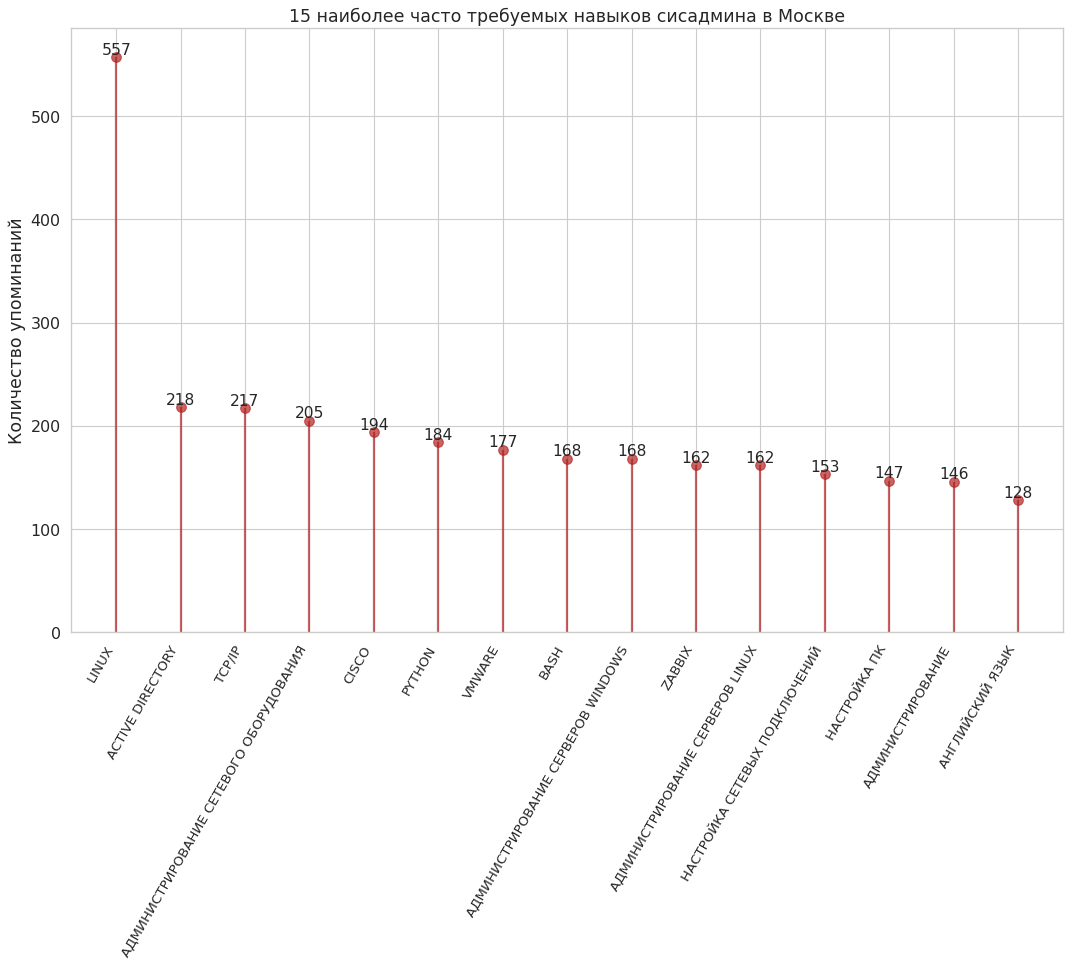

In [ ]:
grouped_key_skills_15 = grouped_key_skills.iloc[0:15]

fig, ax = plt.subplots(figsize=(16,10), dpi= 80)
ax.vlines(x=grouped_key_skills_15.index, ymin=0, ymax=grouped_key_skills_15['count'], color='firebrick', alpha=0.7, linewidth=2)
ax.scatter(x=grouped_key_skills_15.index, y=grouped_key_skills_15['count'], s=75, color='firebrick', alpha=0.7)

ax.set_title('15 наиболее часто требуемых навыков сисадмина в Москве')
ax.set_ylabel('Количество упоминаний')
ax.set_xticks(grouped_key_skills_15.index)
ax.set_xticklabels(grouped_key_skills_15['skill'].str.upper(), rotation=60, fontdict={'horizontalalignment': 'right', 'size':12})
ax.set_ylim(0,)

for row in grouped_key_skills_15.itertuples():
    ax.text(row.Index, row.count, s=round(row.count, 2), horizontalalignment= 'center', verticalalignment='bottom', fontsize=14)

plt.show()

*Посмотрим, зарплаты в каких валютах встречаются в датасете.*

In [ ]:
vacancy_df.groupby(['salary.currency']).size()

salary.currency
EUR      1
RUR    718
USD     11
dtype: int64

*Евро, доллары и рубли. Учтём это - будем, как и в случае с аналитиками данных, переводить зарплаты в рубли и учитывать налоговые вычеты.*

In [ ]:
# Функция, возвращающая коэффициент, переводящий евро и доллары в рубли
def convert(currency):
  if currency == 'EUR':
    return euro_value 
  elif currency == 'USD':
    return dollar_value
  else:
    return 1

# Функция, возвращающая коэффициент, переводящий gross-зарплаты в соотв. net-зарплату, 
# т.е. для зарплат, указанных без учёта налогового вычета, функция возвращает коэффициент,
# при домножении на который получается сумма оплаты труда с учётом налогов (-13 %)
def tax(gross_param):
  if gross_param:
    return 0.87
  else:
    return 1

# Рассмотрим датасет, в котором нет строк, в которых не указаны никакие сведения о зарплате
vacancy_df_without_nan_salaries = vacancy_df.dropna(subset=['salary.from', 'salary.to', 'salary.currency', 'salary.gross'], how='all')
vacancy_df_without_nan_salaries = vacancy_df_without_nan_salaries.reset_index()
del vacancy_df_without_nan_salaries['index']

# Вычислим нижнюю границу зарплаты в рублях после вычета налогов, а также медиану и среднее значение
vacancy_df_without_nan_salaries['salary.from in rubles'] = vacancy_df_without_nan_salaries['salary.from'] * (vacancy_df_without_nan_salaries['salary.currency'].apply(convert)) * (vacancy_df_without_nan_salaries['salary.gross'].apply(tax))
vacancy_salary_from_median = vacancy_df_without_nan_salaries['salary.from in rubles'].median()
vacancy_salary_from_mean = vacancy_df_without_nan_salaries['salary.from in rubles'].mean()

# Вычислим верхнюю границу зарплаты в рублях после вычета налогов
vacancy_df_without_nan_salaries['salary.to in rubles'] = vacancy_df_without_nan_salaries['salary.to'] * (vacancy_df_without_nan_salaries['salary.currency'].apply(convert)) * (vacancy_df_without_nan_salaries['salary.gross'].apply(tax))
vacancy_salary_to_median = vacancy_df_without_nan_salaries['salary.to in rubles'].median()
vacancy_salary_to_mean = vacancy_df_without_nan_salaries['salary.to in rubles'].mean()

*Построим гистограмму нижних границ.*

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


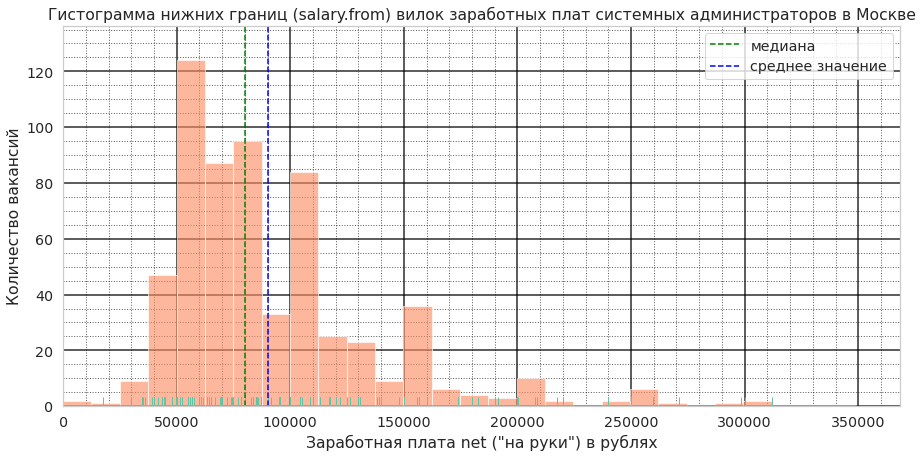

In [ ]:
plt.figure(figsize=(15, 7))
sns.distplot(vacancy_df_without_nan_salaries['salary.from in rubles'], bins=25, rug=True)
plt.hist(vacancy_df_without_nan_salaries['salary.from in rubles'], bins=25, alpha=0.63)
plt.xlabel('Заработная плата net ("на руки") в рублях')
plt.ylabel('Количество вакансий')
plt.title('Гистограмма нижних границ (salary.from) вилок заработных плат системных администраторов в Москве')
plt.ylim(0,)
plt.xlim(0,)
plt.minorticks_on()
plt.grid(which='minor', color = 'k', linestyle = ':', alpha=0.63)
plt.grid(which='major', color = 'k', linewidth = 2, alpha=0.63)
plt.vlines(vacancy_salary_from_median, 0, 10000, color='green', linestyle='--', label='медиана')
plt.vlines(vacancy_salary_from_mean, 0, 10000, color='blue', linestyle='--', label='среднее значение')
plt.legend()
plt.show()

*Видим, что большая часть нижних границ зарплатных вилок сисадминов в Москве попадает на промежуток от 50 до 120 тысяч рублей*

*Построим гистограмму верхних границ.*

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


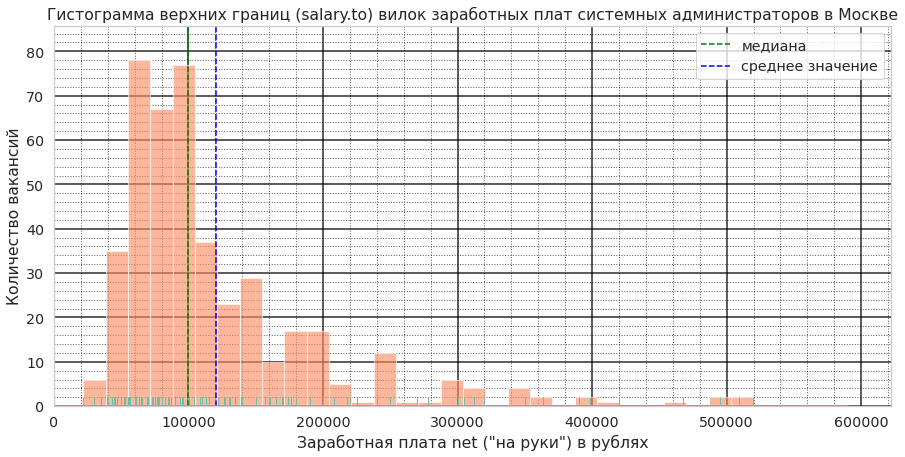

In [ ]:
plt.figure(figsize=(15, 7))
sns.distplot(vacancy_df_without_nan_salaries['salary.to in rubles'], bins=30, rug=True)
plt.hist(vacancy_df_without_nan_salaries['salary.to in rubles'], bins=30, alpha=0.63)
plt.xlabel('Заработная плата net ("на руки") в рублях')
plt.ylabel('Количество вакансий')
plt.title('Гистограмма верхних границ (salary.to) вилок заработных плат системных администраторов в Москве')
plt.ylim(0,)
plt.xlim(0,)
plt.minorticks_on()
plt.grid(which='minor', color = 'k', linestyle = ':', alpha=0.63)
plt.grid(which='major', color = 'k', linewidth = 2, alpha=0.63)
plt.vlines(vacancy_salary_to_median, 0, 10000, color='green', linestyle='--', label='медиана')
plt.vlines(vacancy_salary_to_mean, 0, 10000, color='blue', linestyle='--', label='среднее значение')
plt.legend()
plt.show()

*Видим, что есть выбросы - очень высокие верхние границы (например, около 500 тысяч рублей). Рассмотрим те же данные, но на промежутке, в котором расположена большая часть зарплат - до 300 тысяч рублей).*

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


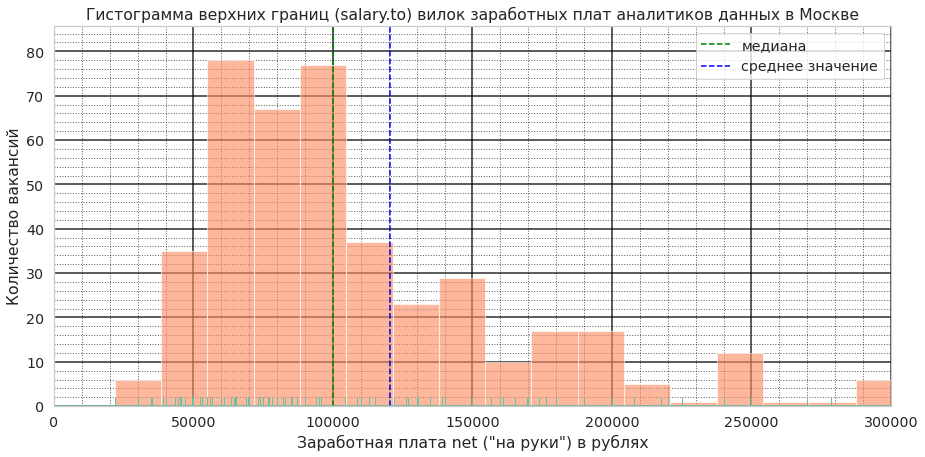

In [ ]:
plt.figure(figsize=(15, 7))
sns.distplot(vacancy_df_without_nan_salaries['salary.to in rubles'], bins=30, rug=True)
plt.hist(vacancy_df_without_nan_salaries['salary.to in rubles'], bins=30, alpha=0.63)
plt.xlabel('Заработная плата net ("на руки") в рублях')
plt.ylabel('Количество вакансий')
plt.title('Гистограмма верхних границ (salary.to) вилок заработных плат аналитиков данных в Москве')
plt.ylim(0,)
plt.xlim(0, 300000)
plt.minorticks_on()
plt.grid(which='minor', color = 'k', linestyle = ':', alpha=0.63)
plt.grid(which='major', color = 'k', linewidth = 2, alpha=0.63)
plt.vlines(vacancy_salary_to_median, 0, 10000, color='green', linestyle='--', label='медиана')
plt.vlines(vacancy_salary_to_mean, 0, 10000, color='blue', linestyle='--', label='среднее значение')
plt.legend()
plt.show()

*Видим, что большая часть верхних границ зарплатных вилок сисадминов в Москве расположена в промежутке от 60 до 100 тысяч рублей.*

In [ ]:
vacancy_df_without_nan_salaries_from_and_to = vacancy_df_without_nan_salaries.dropna(subset=['salary.from', 'salary.to'], how='any')
vacancy_df_without_nan_salaries_from_and_to = vacancy_df_without_nan_salaries_from_and_to.reset_index()
del vacancy_df_without_nan_salaries_from_and_to['index']

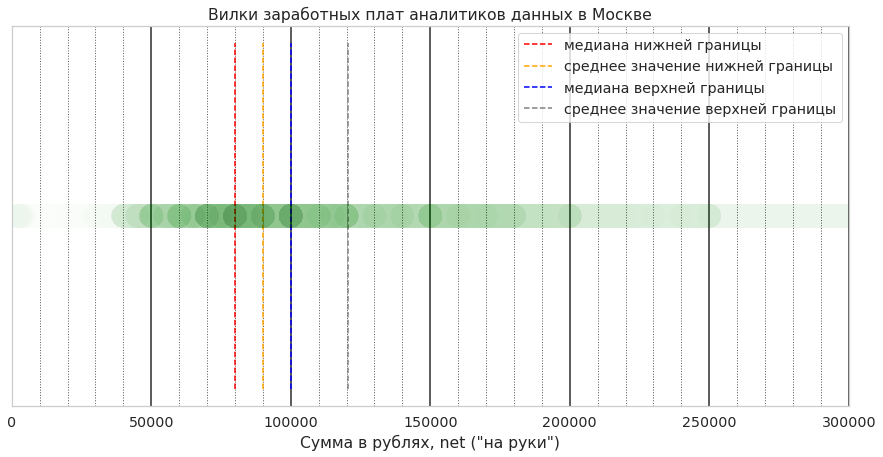

In [ ]:
plt.figure(figsize=(15, 7))

for i in range(vacancy_df_without_nan_salaries_from_and_to.shape[0]):
  current_from = vacancy_df_without_nan_salaries_from_and_to['salary.from'][i]
  current_to = vacancy_df_without_nan_salaries_from_and_to['salary.to'][i]
  x = np.arange(current_from, current_to)
  y = np.zeros(int(current_to) - int(current_from))
  plt.plot(x, y, color='green', alpha=0.008, linewidth = 24)
  #На примере прошлого графики видно, что полезно выставить ограничение сверху на ось OX
  plt.xlim(0, 300000)
  plt.yticks([])

plt.minorticks_on()
plt.grid(which='minor', color = 'k', linestyle = ':', alpha=0.63)
plt.grid(which='major', color = 'k', linewidth = 2, alpha=0.63)
plt.xlabel('Сумма в рублях, net ("на руки")')
plt.title('Вилки заработных плат аналитиков данных в Москве')
plt.vlines(vacancy_salary_from_median, -100000, 100000, color='red', linestyle='--', label='медиана нижней границы')
plt.vlines(vacancy_salary_from_mean, -100000, 100000, color='orange', linestyle='--', label='среднее значение нижней границы')
plt.vlines(vacancy_salary_to_median, -100000, 100000, color='blue', linestyle='--', label='медиана верхней границы')
plt.vlines(vacancy_salary_to_mean, -100000, 100000, color='grey', linestyle='--', label='среднее значение верхней границы')
plt.legend()
plt.show()

*Видим, что наоболее "густо" вилки зарплат сисадминов в Москве покрывают промежуток от 60 до 110 тысяч рублей.*


---
### <font color="orange"><i>Сложная часть</i></font>

### Задача 2.   

Для *одной* из рассмотренных ранее профессий ответьте на следующие вопросы:  
- Какой опыт требуется для данной вакансии?
- Какие работодатели в топе? 
- В каком районе Москвы данная вакансия пользуется наибольшим и наименьшим спросом?

Не забудьте про визуализацию, для этого используйте библиотеку plotly. В частности, постройте распределений вакансий на карте.

Для построения последних двух графиков вам могут понадобиться <a target="_blank" href="https://ru.wikipedia.org/wiki/Список_станций_Московского_метрополитена">внешние данные</a>.


*Будем отвечать на поставленные вопросы для профессии сисадмина.*

*Сохраним данные по сисадминам.*

In [ ]:
big_df_of_sysadmins = big_df.copy()
vacancy_df_of_sysadmins = vacancy_df.copy()

*Загрузим сохранённые ранее данные по аналитикам данных.*

In [ ]:
big_df = vacancy_df_of_analitics.copy()
vacancy_df = vacancy_df_of_analitics.copy()

*Подготовим данные.*

In [ ]:
# from google.colab import drive
# drive.mount('/drive')

# from google.colab import drive
# drive.mount('/content/gdrive')

# !cp '/content/gdrive/My Drive/<vacancy.xlsx>' <vacancy.xlsx>

vacancy_df = pd.read_excel('/vacancy.xlsx')

In [ ]:
# Подготовим данные к анализу - удалим строки, в которых в графе 'experience.name' есть пропуски
vacancy_df_without_nan_experience_name = vacancy_df.dropna(subset=['experience.name'], how='any')

vacancy_df_without_nan_experience_name_grouped = pd.DataFrame(vacancy_df_without_nan_experience_name.groupby('experience.name').size(), columns=['count'])
vacancy_df_without_nan_experience_name_grouped = vacancy_df_without_nan_experience_name_grouped.reset_index()
vacancy_df_without_nan_experience_name_grouped = vacancy_df_without_nan_experience_name_grouped.sort_values(by='count', ascending=False)
vacancy_df_without_nan_experience_name_grouped = vacancy_df_without_nan_experience_name_grouped.reset_index()
del vacancy_df_without_nan_experience_name_grouped['index']
vacancy_df_without_nan_experience_name_grouped

,experience.name,count
0,От 1 года до 3 лет,2333
1,От 3 до 6 лет,1321
2,Нет опыта,218
3,Более 6 лет,73


In [ ]:
# Переставим, чтобы вывести категории опыта в порядке от "Нет опыта" до "Более 6 лет"
vacancy_df_without_nan_experience_name_grouped = pd.DataFrame({'experience.name': 
                                                               [vacancy_df_without_nan_experience_name_grouped['experience.name'][2], 
                                                               vacancy_df_without_nan_experience_name_grouped['experience.name'][0], 
                                                                vacancy_df_without_nan_experience_name_grouped['experience.name'][1], 
                                                                vacancy_df_without_nan_experience_name_grouped['experience.name'][3]], 
                                                               'count': [vacancy_df_without_nan_experience_name_grouped['count'][2],
                                                                         vacancy_df_without_nan_experience_name_grouped['count'][0] ,  
                                                                         vacancy_df_without_nan_experience_name_grouped['count'][1], 
                                                                         vacancy_df_without_nan_experience_name_grouped['count'][3]]})
vacancy_df_without_nan_experience_name_grouped

,experience.name,count
0,Нет опыта,218
1,От 1 года до 3 лет,2333
2,От 3 до 6 лет,1321
3,Более 6 лет,73


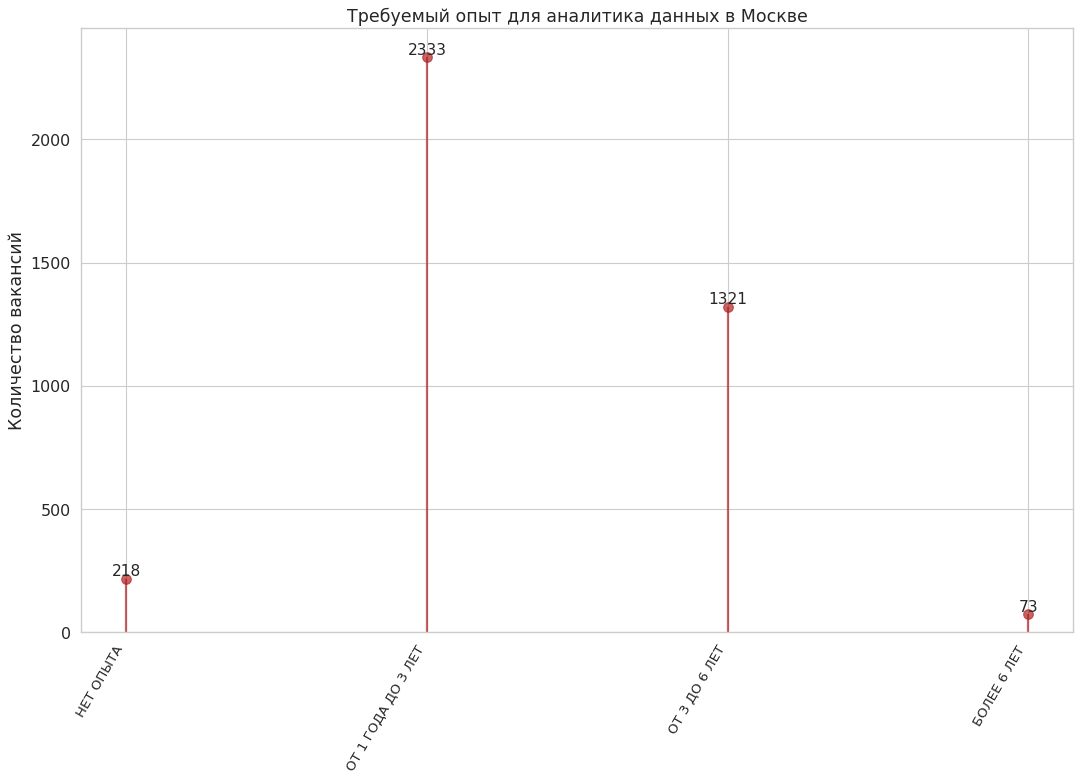

In [ ]:
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)
ax.vlines(x=vacancy_df_without_nan_experience_name_grouped.index, ymin=0, ymax=vacancy_df_without_nan_experience_name_grouped['count'], color='firebrick', alpha=0.7, linewidth=2)
ax.scatter(x=vacancy_df_without_nan_experience_name_grouped.index, y=vacancy_df_without_nan_experience_name_grouped['count'], s=75, color='firebrick', alpha=0.7)

ax.set_title('Требуемый опыт для аналитика данных в Москве')
ax.set_ylabel('Количество вакансий')
ax.set_xticks(vacancy_df_without_nan_experience_name_grouped.index)
ax.set_xticklabels(vacancy_df_without_nan_experience_name_grouped['experience.name'].str.upper(), rotation=60, fontdict={'horizontalalignment': 'right', 'size':12})
ax.set_ylim(0,)

for row in vacancy_df_without_nan_experience_name_grouped.itertuples():
    ax.text(row.Index, row.count, s=round(row.count, 2), horizontalalignment= 'center', verticalalignment='bottom', fontsize=14)

plt.show()

*Видим, что наиболее востребованы специалисты с опытом работы от года до 3 лет, а также специалисты с опытом работы от 3 до 6 лет. В свою очередь, наименее востребованными оказались самые опытные специалисты - соискатели с опытом работы более 6 лет.*

*Посмотрим, какие работадатели в топе по количеству опубликованных вакансий аналитика данных в Москве.*

In [ ]:
# Подготовим данные к анализу - удалим строки, в которых в графе 'employer.name' есть пропуски
vacancy_df_without_nan_employer_name = vacancy_df.dropna(subset=['employer.name'], how='any')

vacancy_df_without_nan_employer_name_grouped = pd.DataFrame(vacancy_df_without_nan_employer_name.groupby('employer.name').size(), columns=['count'])
vacancy_df_without_nan_employer_name_grouped = vacancy_df_without_nan_employer_name_grouped.reset_index()
vacancy_df_without_nan_employer_name_grouped = vacancy_df_without_nan_employer_name_grouped.sort_values(by='count', ascending=False)
vacancy_df_without_nan_employer_name_grouped = vacancy_df_without_nan_employer_name_grouped.reset_index()
del vacancy_df_without_nan_employer_name_grouped['index']

In [ ]:
#Проверим, что в 15-ой строке 'count' меньше, чем в 14-ой, т.е. отсечка первых 15-ти работадателей справедлива
vacancy_df_without_nan_employer_name_grouped[14:16]

,employer.name,count
14,"РОСБАНК, Societe Generale Group (Russia)",24
15,Tele2,23


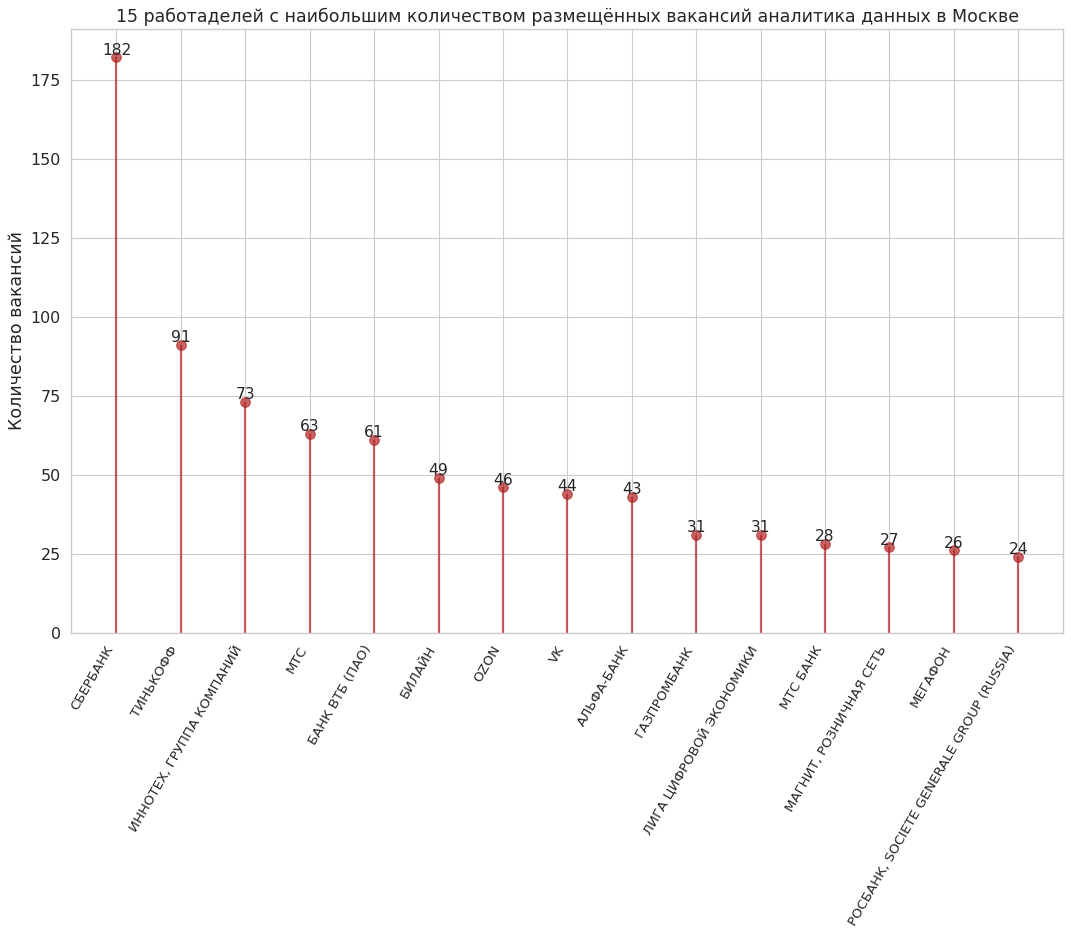

In [ ]:
vacancy_df_without_nan_employer_name_grouped = vacancy_df_without_nan_employer_name_grouped[0:15]

fig, ax = plt.subplots(figsize=(16,10), dpi= 80)
ax.vlines(x=vacancy_df_without_nan_employer_name_grouped.index, ymin=0, ymax=vacancy_df_without_nan_employer_name_grouped['count'], color='firebrick', alpha=0.7, linewidth=2)
ax.scatter(x=vacancy_df_without_nan_employer_name_grouped.index, y=vacancy_df_without_nan_employer_name_grouped['count'], s=75, color='firebrick', alpha=0.7)

ax.set_title('15 работаделей с наибольшим количеством размещённых вакансий аналитика данных в Москве')
ax.set_ylabel('Количество вакансий')
ax.set_xticks(vacancy_df_without_nan_employer_name_grouped.index)
ax.set_xticklabels(vacancy_df_without_nan_employer_name_grouped['employer.name'].str.upper(), rotation=60, fontdict={'horizontalalignment': 'right', 'size':12})
ax.set_ylim(0,)

for row in vacancy_df_without_nan_employer_name_grouped.itertuples():
    ax.text(row.Index, row.count, s=round(row.count, 2), horizontalalignment= 'center', verticalalignment='bottom', fontsize=14)

plt.show()

*Отобразим результаты исследования востребованности вакансий аналитика данных на карте Москвы с привязкой вакансий к станциям метро (и приравненным здесь к ним станциям МЦК, МЦД, монорельса).*

*Скачаем json с данными по станциям мосметро от API hh.ru.*

In [ ]:
req_metro = requests.get("https://api.hh.ru/metro/1")
data_metro = json.loads(req_metro.content.decode())

*Подготовим данные к анализу - составим DataFrame станций.*

In [ ]:
metro_lines_df = pd.DataFrame(data_metro['lines'], columns=['hex_color', 'id', 'name',   'stations'])
metro_lines_df['id'] = metro_lines_df['id'].apply(int)
metro_lines_df = metro_lines_df.sort_values(by=['id'], ascending=True)
metro_lines_df = metro_lines_df.reset_index()
del metro_lines_df['index']

metro_lines_df_id_indexes = metro_lines_df.copy()
metro_lines_df_id_indexes.index = metro_lines_df_id_indexes['id']
del metro_lines_df_id_indexes['id']

metro_lines_df_name_indexes = metro_lines_df.copy()
metro_lines_df_name_indexes.index = metro_lines_df_name_indexes['name']
del metro_lines_df_name_indexes['name']

In [ ]:
from functools import reduce

merge = lambda s: reduce(lambda d,el: d.extend(el) or d, s, [])
merged_metro_stations = merge(metro_lines_df['stations'])
merged_metro_stations = pd.Series(np.array(merged_metro_stations))
merged_metro_stations_names = pd.DataFrame(merged_metro_stations.apply(lambda x: x['name']), columns=['station'])
merged_metro_stations_ids =  pd.DataFrame(merged_metro_stations.apply(lambda x: x['id']), columns=['id'])
merged_metro_stations_lats =  pd.DataFrame(merged_metro_stations.apply(lambda x: x['lat']), columns=['lat'])
merged_metro_stations_lngs =  pd.DataFrame(merged_metro_stations.apply(lambda x: x['lng']), columns=['lng'])
merged_metro_stations_orders =  pd.DataFrame(merged_metro_stations.apply(lambda x: x['order']), columns=['order'])
merged_metro_stations_lines = pd.DataFrame(merged_metro_stations.apply(lambda x: metro_lines_df_id_indexes.loc[int(float(x['id'])), 'name']), columns=['line'])
merged_metro_stations_lines_line_index = merged_metro_stations_lines.copy()
merged_metro_stations_lines_line_index.index = merged_metro_stations_lines_line_index['line']
merged_metro_stations = pd.concat(objs=[merged_metro_stations_names, merged_metro_stations_lines, merged_metro_stations_lats, 
                                  merged_metro_stations_lngs, merged_metro_stations_orders,
                                  merged_metro_stations_ids], axis=1)
merged_metro_stations_line_color = (pd.DataFrame(merged_metro_stations['line'])).apply(lambda x: metro_lines_df_name_indexes.loc[x, 'hex_color'])
merged_metro_stations_line_color = merged_metro_stations_line_color.reset_index()
del merged_metro_stations_line_color['name']
merged_metro_stations_line_color.columns = ['line color']
merged_metro_stations_line_color
merged_metro_stations = pd.concat(objs=[merged_metro_stations, merged_metro_stations_line_color], axis=1)
merged_metro_stations = merged_metro_stations.reindex(columns=['station', 'line', 'line color', 'lat', 'lng', 'order', 'id'])

*Визуализируем распределение вакансий по районам Москвы.*

In [ ]:
# Импортируем библиотеку plotly
import plotly
import plotly.graph_objects as go
import plotly.express as px

import plotly.io as pio
pio.renderers.default = 'notebook'


plotly.offline.init_notebook_mode(connected=True)

*Визуализируем распределение адресов вакансий аналитика данных по территории города Москвы.*

In [ ]:
# Готовим данные
vacancy_df_without_nans_coordinats = vacancy_df.dropna(subset=['address.lat', 'address.lng'], how='any')
vacancy_df_without_nans_coordinats_grouped = pd.DataFrame(vacancy_df_without_nans_coordinats.groupby(['address.lat', 'address.lng']).size(), columns=['Количество вакансий'])
vacancy_df_without_nans_coordinats_grouped = vacancy_df_without_nans_coordinats_grouped.reset_index()

In [ ]:
# Строим график-карту
fig = px.density_mapbox(
    vacancy_df_without_nans_coordinats_grouped, 
    lat='address.lat', lon='address.lng',  
    z='Количество вакансий', 
    radius=10, 
    center=dict(lat=55.75678, lon=37.62768), 
    zoom=9,  
    mapbox_style="open-street-map", 
    title = "Распределение адресов вакансий аналитика данных по территории города Москвы",
)
fig.show()

In [ ]:
plotly.offline.plot(fig, filename='example.html', auto_open=False)

'example.html'

*Видим, что больше всего вакансий аказалось в ЦАО, что было ожидаемо. На карте явно видны несколько "сгустков" - мест в Москве, где вакансий аналитика данных больше, чем в других местах. Это Москва-сити (район Пресненский и Дорогомилово), бизнес-центры на м. Белорусская (Тверской район), бизнес-центры на м. Технопарк (Даниловский район), ТЦ "Водный" (Головинский район, м. Водный стадион).*

*Теперь визуализируем распределение вакансий аналитиков данных по ближайшим к адресу станциям мосметро.*

In [ ]:
# Готовим данные
vacancy_df_without_nans_metro = vacancy_df.dropna(subset=[ 'address.metro.station_name', 'address.metro.line_name'], how='any')
vacancy_df_without_nans_metro_grouped = pd.DataFrame(vacancy_df_without_nans_metro.groupby(['address.metro.station_name', 'address.metro.line_name']).size(), columns=['count'])
vacancy_df_without_nans_metro_grouped = vacancy_df_without_nans_metro_grouped.reset_index()
vacancy_df_without_nans_metro_grouped.columns =  ['station', 'line', 'Количество вакансий']

In [ ]:
# Соединяем данные по станциям метро и по количеству вакансий на каждой из них
metro_vacancies_merged = pd.merge(left=merged_metro_stations, right=vacancy_df_without_nans_metro_grouped, how='left', on=['station',	'line'])
metro_vacancies_merged['Количество вакансий'] = metro_vacancies_merged['Количество вакансий'].fillna(0)
metro_vacancies_merged['Количество вакансий'] = metro_vacancies_merged['Количество вакансий'].apply(int)

In [ ]:
# Строим график-карту
fig = px.density_mapbox(
    metro_vacancies_merged, 
    lat='lat', lon='lng',  
    z='Количество вакансий', 
    radius=10, 
    center=dict(lat=55.75678, lon=37.62768), 
    zoom=9,  
    mapbox_style="open-street-map", 
    title = "Распределение адресов вакансий аналитика данных по станциям Мосметро"
)
fig.show()

In [ ]:
plotly.offline.plot(fig, filename='example2.html', auto_open=False)

'example2.html'

Эти два файла будут называться "без метро" и "с метро" соотв..

*В целом, карта повторяет прошлую (разве что теперь "сгустки" расположены явно вдоль линий метро). Видны "сгустки" на м. Выставочная, м. Деловой Центр, м. Белорусская, м. Технопарк.*

Какие выводы можно сделать из построенных графиков?

<...>

*1) эксперимент показал, что наибольшее количество вакансий категории "аналитик данных" в Москве выставляют "Тинькофф", "Сбербанк" и "Иннотех", причём "Сбербанк" ищет в 2 раза больше работников, чем следующий за ним "Тинькофф" (см. график "15 работаделей с наибольшим количеством размещённых вакансий аналитика данных в Москве").


2) опыт показал, что наиболее востребованы в Москве аналитики данных с опытом работы от 1 года до 3 лет (см. график "Требуемый опыт для аналитика данных в Москве").


3) эксперимент показал, что наибольшее количество вакансий для аналитиков данных в Москве расположено центральных районах. Большие "сгустки" вакансий есть в районе м. Выставочная, м. Деловой центр, м. Белорусская, м. Технопарк*